## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [83]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [84]:
import warnings

# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv(
    'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv',
    on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

H0: Нет разницы в атаке между группами.

Attack                                                       
       count       mean        std   min   25%   50%     75%    max
Class                                                              
Grass   93.0  73.731183  24.179645  27.0  59.0  70.0   95.00  132.0
Rock    56.0  91.785714  34.805284  10.0  63.0  92.5  116.25  165.0

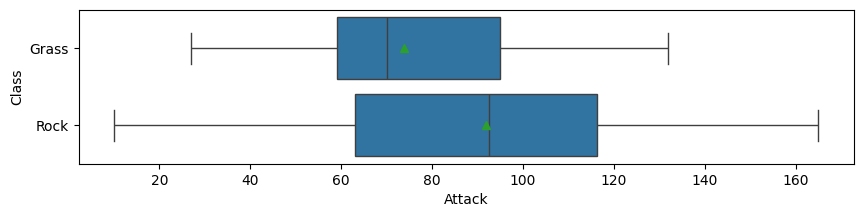

In [85]:
des_class = ['Grass', 'Rock']
z1df = pokemon.copy()

z1df.drop(z1df[(pokemon['Class 1'].isin(des_class)) & (pokemon['Class 2'].isin(des_class))].index, inplace=True)
z1df.loc[(z1df['Class 1'] == 'Grass') | (z1df['Class 2'] == 'Grass'), 'Class'] = 'Grass'
z1df.loc[(z1df['Class 1'] == 'Rock') | (z1df['Class 2'] == 'Rock'), 'Class'] = 'Rock'
z1df = z1df[~(z1df['Class'] == 'nan')]

z1df = z1df[["Class", "Attack", ]]
display(z1df.groupby("Class").describe())

plt.figure(figsize=(10,2))
sns.boxplot(data=z1df, y='Class', x='Attack', showmeans=True)
plt.show()

data_grass = z1df[z1df["Class"] == "Grass"]["Attack"].values
data_rock = z1df[z1df["Class"] == "Rock"]["Attack"].values




нормально распределение

stat = 0.978, pval = 0.112
stat = 0.982, pval = 0.586


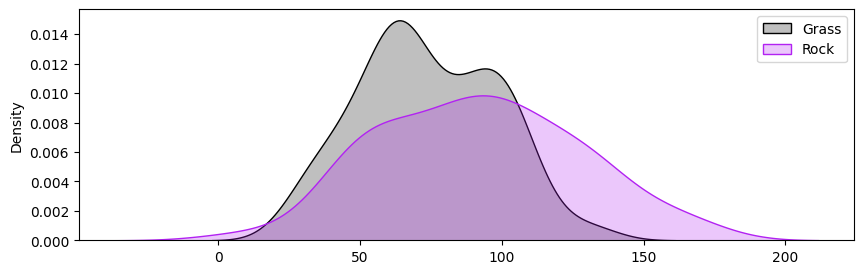

In [86]:
stat, pval = st.shapiro(data_grass)
print("stat = %.3f, pval = %.3f" % (stat, pval))

stat, pval = st.shapiro(data_rock)
print("stat = %.3f, pval = %.3f" % (stat, pval))

plt.figure(figsize=(10,3))
sns.kdeplot(data_grass, label="Grass", fill = True, color = '#000000')
sns.kdeplot(data_rock, label="Rock", fill = True, color = '#B222F2')
plt.legend()
plt.show()

In [87]:
# define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1) / np.var(y, ddof=1)  # calculate F test statistic
    dfn = x.size - 1  # define degrees of freedom numerator
    dfd = y.size - 1  # define degrees of freedom denominator
    p = 1 - st.f.cdf(f, dfn, dfd)  # find p-value of F test statistic
    return f, p

print(f_test(data_grass,data_rock))


(0.48262460954678815, 0.9990088840898671)


stat = -3.729, pval = 0.000
stat = 13.909, pval = 0.000
stat = 1816.500, pval = 0.002
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Grass   Rock  18.0545 0.0003 8.4875 27.6216   True
---------------------------------------------------


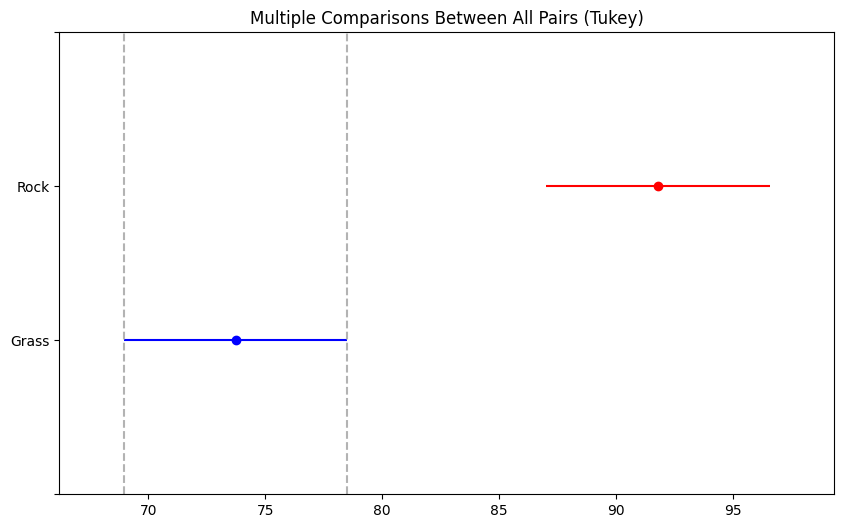

In [88]:
s, p = st.ttest_ind(data_grass, data_rock)
print("stat = %.3f, pval = %.3f" % (s, p))

s, p = st.f_oneway(data_grass, data_rock)
print("stat = %.3f, pval = %.3f" % (s, p))

s, p = st.mannwhitneyu(data_grass, data_rock)
print("stat = %.3f, pval = %.3f" % (s, p))

tukey = pairwise_tukeyhsd(endog=z1df["Attack"].values, groups=z1df['Class'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous(comparison_name="Grass");

вывод: pval < 0.05, Разница есть отклоняем H0<br>
Атака в Rock больше (Непонял как ститистически вывести, что одна группа больше другой)

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

H0: Покемоны в классе Water такие же как и покемоны в классе Normal

In [89]:
des_class = ['Water', 'Normal']
z2df = pokemon.copy()
z2df.drop(z2df[(pokemon['Class 1'].isin(des_class)) & (pokemon['Class 2'].isin(des_class))].index, inplace=True)
z2df.loc[(z2df['Class 1'] == 'Water') | (z2df['Class 2'] == 'Water'), 'Class'] = 'Water'
z2df.loc[(z2df['Class 1'] == 'Normal') | (z2df['Class 2'] == 'Normal'), 'Class'] = 'Normal'
z2df = z2df[~(z2df['Class'] == 'nan')]

print(z2df["Class"].value_counts())
z2df.groupby("Class")["Speed"].describe()

Class
Water     125
Normal    101
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Normal,101.0,72.257426,28.42733,5.0,50.0,72.0,93.0,135.0
Water,125.0,64.936000,22.74889,15.0,50.0,65.0,81.0,122.0


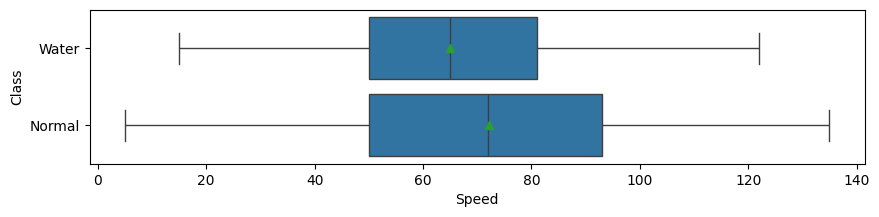

In [90]:

plt.figure(figsize=(10,2))
sns.boxplot(data=z2df, y='Class', x='Speed', showmeans=True);
plt.show()


In [91]:
z2df.groupby("Class")["Speed"].agg(pd.Series.mode)

Class
Normal         100
Water     [60, 70]
Name: Speed, dtype: object

In [92]:
data_water = z2df[z2df["Class"] == "Water"]["Speed"].values
data_normal = z2df[z2df["Class"] == "Normal"]["Speed"].values

s, p = st.mannwhitneyu(data_water, data_normal)
print("stat = %.3f, pval = %.3f" % (s, p))


stat = 5299.500, pval = 0.038


вывод: pval < 0.05, есть статистическая разница между Water и Normal<br>
Покемоны в классе water медленнеее по Параметрам: среднее зн., медианное зн., мода зн.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

h0: усомнились в эффективности вакцины = выборки равны.

In [93]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

145.0 67.89195979899498


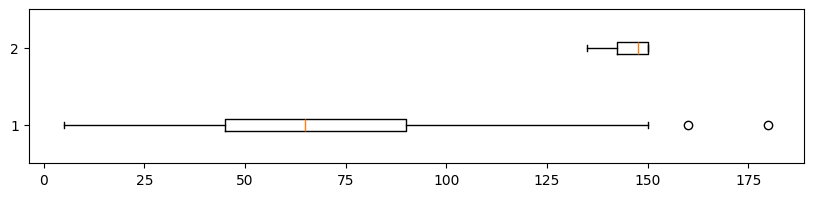

In [94]:
z3df = pokemon.copy()
z3df_threated = z3df[z3df['Name'].isin(treathed_pokemon)]
z3df_other = z3df[~(z3df['Name'].isin(treathed_pokemon))]
print(z3df_threated["Speed"].mean(), z3df_other["Speed"].mean())

plt.figure(figsize=(10,2))
plt.boxplot([z3df_other["Speed"],z3df_threated["Speed"]], vert=False)
plt.show()

In [95]:
z_stat, pval = st.mannwhitneyu(z3df_other["Speed"].values, z3df_threated["Speed"].values)
print(f'z-статистика: {z_stat:.2f}', f'p-value: {pval:.3f}')

z-статистика: 19.50 p-value: 0.001


In [96]:
control_sample1 = z3df_other.sample(n=4, random_state=24)
control_sample2 = z3df_other.sample(n=4, random_state=42)

stat, p = st.kruskal(control_sample1["Speed"].values, control_sample2["Speed"].values, z3df_threated["Speed"].values)
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 8.375, p = 0.015
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Вывод: pval < 0.05 отлоняем H0.<br>
Исходя из графика видим, что скорость тестовой группы нымного выше скорости средней всей выборки.


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

H0: HP, Attack, Defence не отличается между legendary и остальными

In [97]:
z4df = pokemon.copy()
z4df_legendary = z4df[z4df["Legendary"] == True][["HP", "Attack", "Defense"]]
z4df_other = z4df[z4df["Legendary"] == False][["HP", "Attack", "Defense"]]

(z4df_legendary.describe(), z4df_other.describe())

(               HP      Attack     Defense
 count   65.000000   65.000000   65.000000
 mean    92.738462  116.676923   99.661538
 std     21.722164   30.348037   28.255131
 min     50.000000   50.000000   20.000000
 25%     80.000000  100.000000   90.000000
 50%     91.000000  110.000000  100.000000
 75%    105.000000  131.000000  115.000000
 max    150.000000  190.000000  200.000000,
                HP      Attack     Defense
 count  735.000000  735.000000  735.000000
 mean    67.182313   75.669388   71.559184
 std     24.808849   30.490153   30.408194
 min      1.000000    5.000000    5.000000
 25%     50.000000   54.500000   50.000000
 50%     65.000000   72.000000   66.000000
 75%     79.500000   95.000000   85.000000
 max    255.000000  185.000000  230.000000)

stat = 42199.000, pval = 0.000


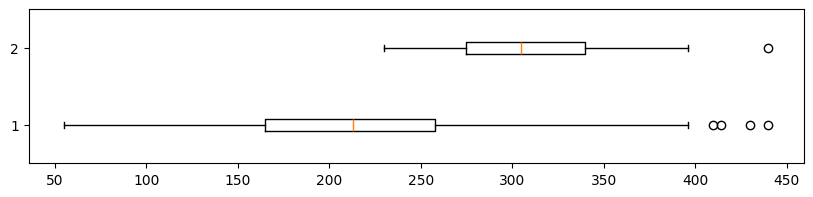

In [98]:
z4df_legendary["SUM_HAD"] = z4df_legendary["HP"] + z4df_legendary["Attack"] + z4df_legendary["Defense"]
z4df_other["SUM_HAD"] = z4df_other["HP"] + z4df_other["Attack"] + z4df_other["Defense"]

stat, pval = st.mannwhitneyu(z4df_legendary["SUM_HAD"].values, z4df_other["SUM_HAD"].values)
print("stat = %.3f, pval = %.3f" % (stat, pval))

plt.figure(figsize=(10,2))
plt.boxplot([z4df_other["SUM_HAD"], z4df_legendary["SUM_HAD"]], vert=False)
plt.show()

Вывод: pval < 0.05, отклоняем H0

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

H0: Не видим разницы по силе обычной защиты

In [99]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

stat = 9.618, pval = 0.000


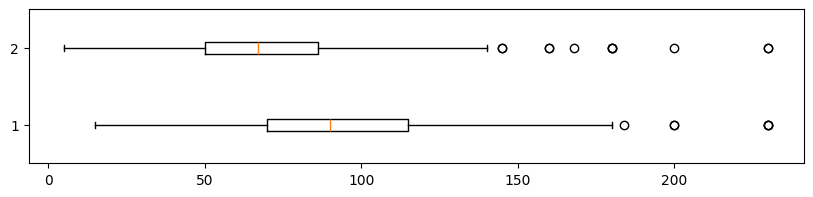

In [100]:
z5df = pokemon.copy()
z5df_best = z5df[z5df["Class 1"].isin(best_defence_class) | z5df["Class 2"].isin(best_defence_class)]
z5df_other = z5df[~(z5df["Class 1"].isin(best_defence_class) & ~(z5df["Class 2"].isin(best_defence_class)))]

stat, pval = st.ttest_ind(z5df_best["Defense"], z5df_other["Defense"])
print("stat = %.3f, pval = %.3f" % (stat, pval))

plt.figure(figsize=(10,2))
plt.boxplot([z5df_best["Defense"], z5df_other["Defense"], ], vert=False)
plt.show()


stat = 10.021, pval = 0.000
Статистика=100.427, p=0.000000


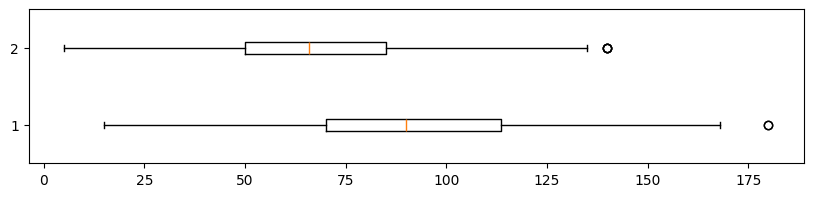

In [101]:
def remove_outliers(data):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_bound = data.quantile(0.25) - (iqr * 1.5)
    upper_bound = data.quantile(0.75) + (iqr * 1.5)
    return data[(data > lower_bound) & (data < upper_bound)]

z5df_best_vals = remove_outliers(z5df_best["Defense"])
z5df_other_vals = remove_outliers(z5df_other["Defense"])

stat, pval = st.ttest_ind(z5df_best_vals, z5df_other_vals)
print("stat = %.3f, pval = %.3f" % (stat, pval))
fvalue, pvalue = st.f_oneway(z5df_best_vals, z5df_other_vals)
print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))

plt.figure(figsize=(10,2))
plt.boxplot([z5df_best_vals, z5df_other_vals], vert=False)
plt.show()


Вывод: pval < 0.05, отклоняем H0, классы отличаются по силе защиты.<br>
Best мог показаться лучше изза наличия выбросов в нем.

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.